In [1]:
# Khai báo packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, recall_score, f1_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [2]:
# Khởi tạo các DataFrame
hanoi_df = pd.read_csv('AQI Vietnam CSV/hanoi-air-quality.csv', encoding='unicode_escape')
quang_ninh_df = pd.read_csv('AQI Vietnam CSV/quang-ninh-air-quality.csv', encoding='unicode_escape')
da_nang_df = pd.read_csv('AQI Vietnam CSV/da-nang-air-quality.csv', encoding='unicode_escape')
nha_trang_df = pd.read_csv('AQI Vietnam CSV/nha-trang-air-quality.csv', encoding='unicode_escape')

In [3]:
hanoi_df.head()

,date,pm25,pm10,o3,no2,so2,co
0,2024/4/1,118,72,11,1,7,7
1,2024/4/2,103,78,11,1,8,8
2,2024/4/3,112,73,11,1,7,8
3,2024/4/4,100,60,13,1,8,2
4,2024/4/5,72,,,,,


In [4]:
hanoi_df.shape
# Có thể thấy DF có 2790 rows và 7 columns

(2790, 7)

In [5]:
# Kiểm tra title các cột trong DataFrame
hanoi_df.columns

Index(['date', ' pm25', ' pm10', ' o3', ' no2', ' so2', ' co'], dtype='object')

## Giải thích chi tiết các chất ô nhiễm được sử dụng để phần tích

........ < Điền vô đây > ..........

In [6]:
# Có thể thấy có khoảng trắng thừa trong title cột
# Xóa tất cả các khoảng trắng trong cột
hanoi_df.columns = hanoi_df.columns.str.strip()

In [7]:
hanoi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2790 entries, 0 to 2789
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    2790 non-null   object
 1   pm25    2790 non-null   object
 2   pm10    2790 non-null   object
 3   o3      2790 non-null   object
 4   no2     2790 non-null   object
 5   so2     2790 non-null   object
 6   co      2790 non-null   object
dtypes: object(7)
memory usage: 152.7+ KB


In [8]:
# Chuyển đổi trường "date" sang kiểu Datetime
hanoi_df['date'] = pd.to_datetime(hanoi_df['date'], format='%Y/%m/%d')

# sắp xếp dữ liệu theo thời gian
hanoi_df = hanoi_df.sort_values(by=["date"], ascending=False)
hanoi_df= hanoi_df.reset_index(drop=True)

In [9]:
# Các chỉ số trên là giá trị avg(trung bình) được đo từ các trạm trong khu vực -> Có kiểu Int
# Chuyển đổi các cột chất ô nhiễm sang kiểu Int (["pm25", "pm10", "o3", "no2", "so2", "co"])
columns_to_convert = ['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']

# Chuyển kiểu các chỉ số không khí sang 'int'
for col in columns_to_convert:
    hanoi_df[col] = pd.to_numeric(hanoi_df[col], errors='coerce').astype('Int64')

In [10]:
hanoi_df.isnull().sum()

date      0
pm25    251
pm10    256
o3      471
no2     420
so2     409
co      525
dtype: int64

In [11]:
# Ta thấy có các giá trị Null trong DataFrame

# Sử dụng giá trị trung vị (median):
# Dữ liệu có phân phối không đối xứng hoặc nhiều giá trị ngoại lệ: 
#   Trong trường hợp dữ liệu có phân phối không đối xứng hoặc có nhiều giá trị ngoại lệ, việc sử dụng giá trị trung vị có thể là một lựa chọn tốt hơn. Giá trị trung vị không bị ảnh hưởng bởi giá trị ngoại lệ và cho phản ánh tốt hơn về điểm trung tâm của dữ liệu.
# Khi muốn đánh giá tính ổn định của trung tâm dữ liệu: Giá trị trung vị thường ít nhạy cảm hơn với các biến động trong dữ liệu so với giá trị trung bình.

# Giá trị mean
mean_values = hanoi_df.median()
# Gắn giá trị trung bình cho các giá trị null trong từng cột
hanoi_df.fillna(mean_values, inplace=True)

In [12]:
hanoi_df.isnull().sum()

date    0
pm25    0
pm10    0
o3      0
no2     0
so2     0
co      0
dtype: int64

In [13]:
# ....
hanoi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2790 entries, 0 to 2789
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2790 non-null   datetime64[ns]
 1   pm25    2790 non-null   Int64         
 2   pm10    2790 non-null   Int64         
 3   o3      2790 non-null   Int64         
 4   no2     2790 non-null   Int64         
 5   so2     2790 non-null   Int64         
 6   co      2790 non-null   Int64         
dtypes: Int64(6), datetime64[ns](1)
memory usage: 169.1 KB


In [14]:
# ....
hanoi_df.describe()

,date,pm25,pm10,o3,no2,so2,co
count,2790,2790.0,2790.0,2790.0,2790.0,2790.0,2790.0
mean,2019-09-25 17:59:13.548387072,71.90681,38.291039,17.765591,19.124731,12.687814,11.491398
min,2014-01-01 00:00:00,2.0,1.0,1.0,1.0,1.0,1.0
25%,2017-04-10 06:00:00,39.0,23.0,9.0,13.0,8.0,7.0
50%,2020-04-23 12:00:00,65.0,36.0,14.0,18.0,12.0,9.0
75%,2022-03-24 18:00:00,99.0,51.0,19.0,25.0,15.0,12.0
max,2024-04-05 00:00:00,299.0,187.0,498.0,75.0,52.0,102.0
std,NaN,42.05454,21.553869,22.198675,9.323988,7.282426,9.194198


In [15]:
# Dựa vào quy trình xử lý dữ liệu giống DF: hanoi_df
# Tạo hàm cleaning DataFrame
def clean_df(df):
    df.columns = df.columns.str.strip()
    df['date'] = pd.to_datetime(df['date'], format='%Y/%m/%d')

    # sắp xếp dữ liệu theo thời gian
    df = df.sort_values(by=["date"], ascending=False)
    df= df.reset_index(drop=True)

    # Kiểu dữ liệu của cột 'pm25' và các chỉ số đo chất lượng không khí phải là kiểu số nguyên
    columns_to_convert = ['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']

    # Chuyển kiểu các chỉ số không khí sang 'int'
    for col in columns_to_convert:
        df[col] = pd.to_numeric(df[col], errors='coerce').astype('Int64')

    # Giá trị mean
    mean_values = df.median()
    # Gắn giá trị trung bình cho các giá trị null trong từng cột
    df.fillna(mean_values, inplace=True)

    return df

In [16]:
# Cleaning DataFrames
quang_ninh_df = clean_df(quang_ninh_df)
da_nang_df = clean_df(da_nang_df)
nha_trang_df = clean_df(nha_trang_df)

In [17]:
# Tạo hàm biểu diễn mối tương quan giữa các chất ô nhiễm
def show_corr(df, name):
    # Loại bỏ cột 'date' khỏi DataFrame
    df_toxic_sub = df.drop(columns=['date'])

    # Tính toán ma trận tương quan
    correlation_matrix = df_toxic_sub.corr()

    # Biểu diễn mối tương quan bằng heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title(f"Correlation Matrix of Air Quality Index {name}")
    plt.show()

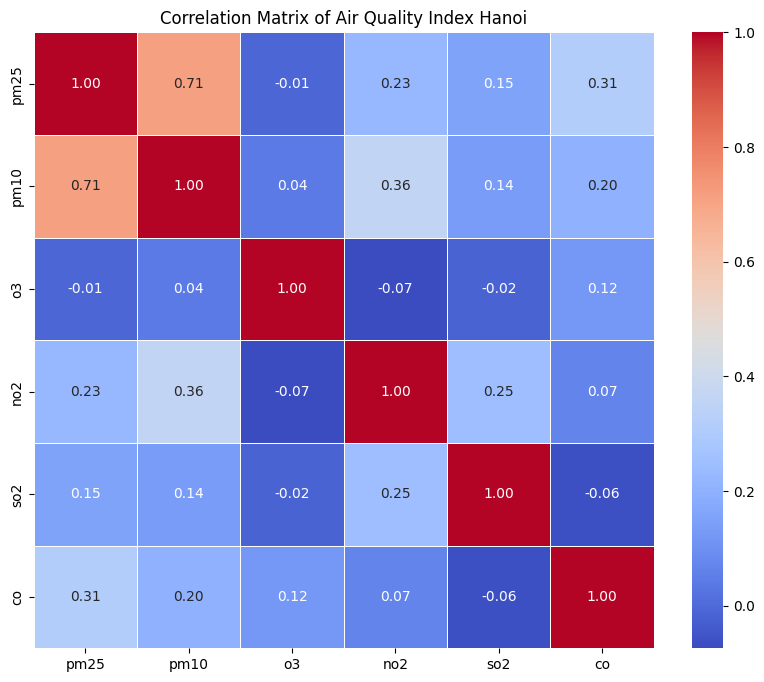

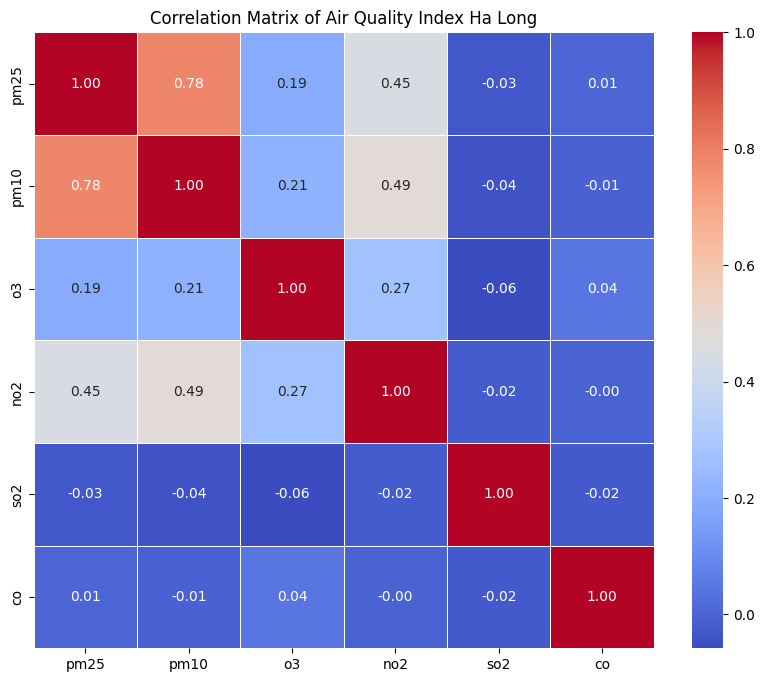

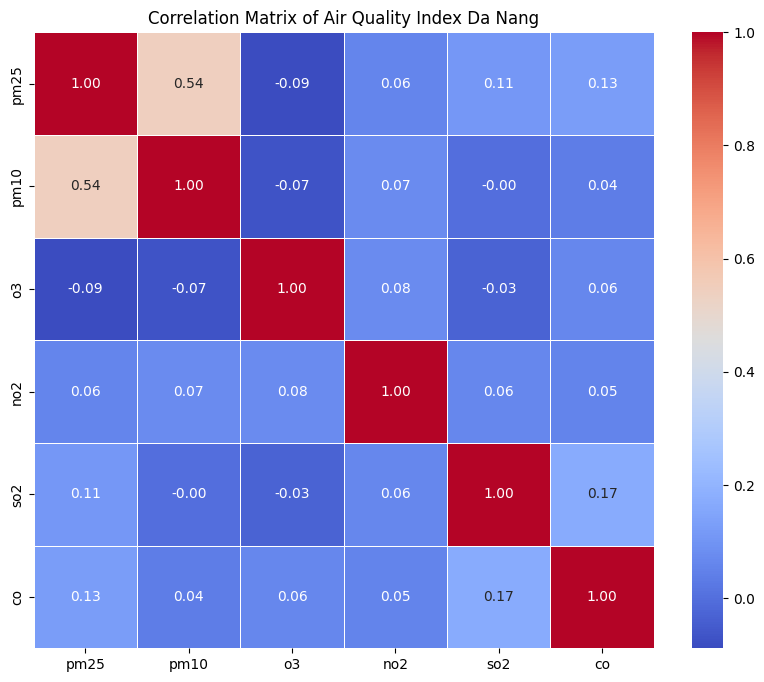

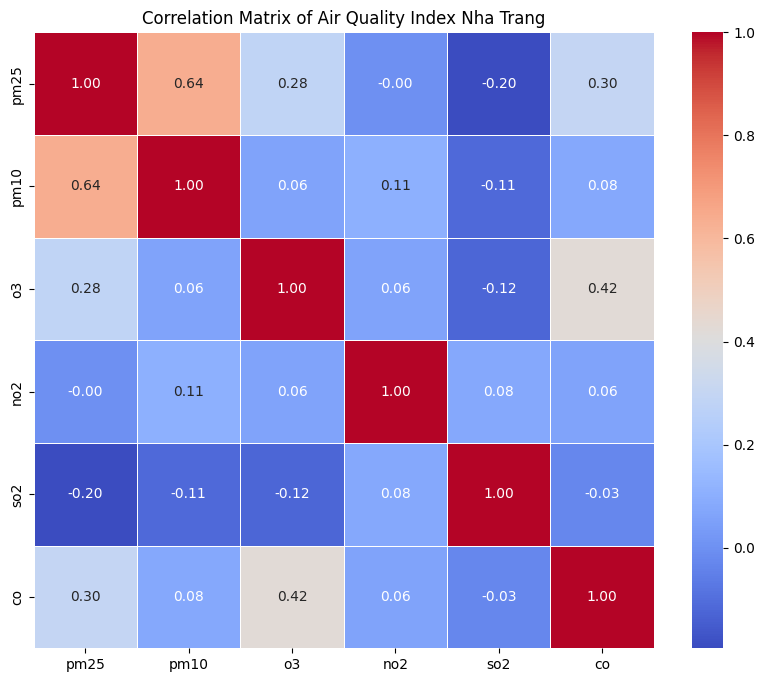

In [18]:
# Phân tích các mối tương quan này
# ....

show_corr(hanoi_df, "Hanoi")
show_corr(quang_ninh_df, "Ha Long")
show_corr(da_nang_df, "Da Nang")
show_corr(nha_trang_df, "Nha Trang")

In [19]:
# Tạo hàm phân loại chất lượng ô nhiễm và chỉ số AQI
def aqi_classification(df):
    # Tính toán cột 'aqi' là giá trị lớn nhất của các chất độc hại
    df['aqi'] = df[['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']].max(axis=1)

    # Xây dựng hàm để xác định loại AQI dựa trên giá trị aqi
    def categorize_aqi(aqi):
        if aqi <= 50:
            return 'Good'
        elif 51 <= aqi <= 100:
            return 'Moderate'
        elif 101 <= aqi <= 150:
            return 'Unhealthy for Sensitive Groups'
        elif 151 <= aqi <= 200:
            return 'Unhealthy'
        else:
            return 'Very Unhealthy'
        # elif 201 <= aqi <= 300:
        #     return 'Very Unhealthy'
        # else:
        #     return 'Hazardous'

    # Áp dụng hàm để tạo cột 'AQI Category'
    df['AQI Category'] = df['aqi'].apply(categorize_aqi)

    return df

In [20]:
hanoi_df = aqi_classification(hanoi_df)
quang_ninh_df = aqi_classification(quang_ninh_df)
da_nang_df = aqi_classification(da_nang_df)
nha_trang_df = aqi_classification(nha_trang_df)

In [21]:
#
hanoi_df.head()

,date,pm25,pm10,o3,no2,so2,co,aqi,AQI Category
0,2024-04-05,72,36,14,18,12,9,72,Moderate
1,2024-04-04,100,60,13,1,8,2,100,Moderate
2,2024-04-03,112,73,11,1,7,8,112,Unhealthy for Sensitive Groups
3,2024-04-02,103,78,11,1,8,8,103,Unhealthy for Sensitive Groups
4,2024-04-01,118,72,11,1,7,7,118,Unhealthy for Sensitive Groups


In [22]:
hanoi_df['AQI Category'].value_counts()

AQI Category
Moderate                          1174
Good                               899
Unhealthy for Sensitive Groups     550
Unhealthy                          156
Very Unhealthy                      11
Name: count, dtype: int64

In [23]:
def aqi_graph_over_time(df, name, start_time=None, end_time=None):
    # Lọc dữ liệu theo khoảng thời gian nếu được chỉ định
    if start_time and end_time:
        df = df[(df['date'] >= start_time) & (df['date'] <= end_time)]
    
    # print(df)

    # Vẽ biểu đồ
    plt.figure(figsize=(10, 6))
    plt.plot(df['date'], df['aqi'], marker='o', linestyle='-')

    # Đặt tiêu đề và nhãn cho các trục
    plt.title(f'Biểu đồ phân bố AQI theo thời gian tại {name}')
    plt.xlabel('Ngày')
    plt.ylabel('AQI')

    # Hiển thị biểu đồ
    plt.grid(True)
    plt.xticks(rotation=45)  # Xoay nhãn trục x để dễ đọc
    plt.tight_layout()
    plt.show()

In [24]:
# Tạo bảng cột để phân tích kiểm tra các chất gây ô nhiễm thường xuyên nhất gây ra AQI
def frequency_of_pollutants(df, name, start_time=None, end_time=None):
    # Tạo biểu đồ
    plt.figure(figsize=(10, 6))

    if start_time and end_time:
        df = df[(df['date'] >= start_time) & (df['date'] <= end_time)]

    # Tạo một DataFrame mới chỉ chứa các chỉ số độc hại có giá trị lớn nhất
    max_pollutants_df = df.loc[:, ['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']].idxmax(axis=1)

    # Đếm số lượng các chỉ số độc hại tạo ra AQI
    max_pollutants_counts = max_pollutants_df.value_counts()

    # Vẽ biểu đồ cột
    ax = max_pollutants_counts.plot(kind='bar', color='blue')

    # Đặt tiêu đề và nhãn cho biểu đồ
    plt.title(f'Các chất gây ô nhiễm đạt ngưỡng AQI tại {name}')
    plt.xlabel('Chất ô nhiễm')
    plt.ylabel('Tần số')

    # Hiển thị số lượng chi tiết trên mỗi cột
    for i, count in enumerate(max_pollutants_counts):
        ax.text(i, count + 0.1, str(count), ha='center', va='bottom')

    # Hiển thị biểu đồ
    plt.xticks(rotation=45)  # Xoay nhãn trục x để dễ đọc hơn
    plt.tight_layout()
    plt.show()

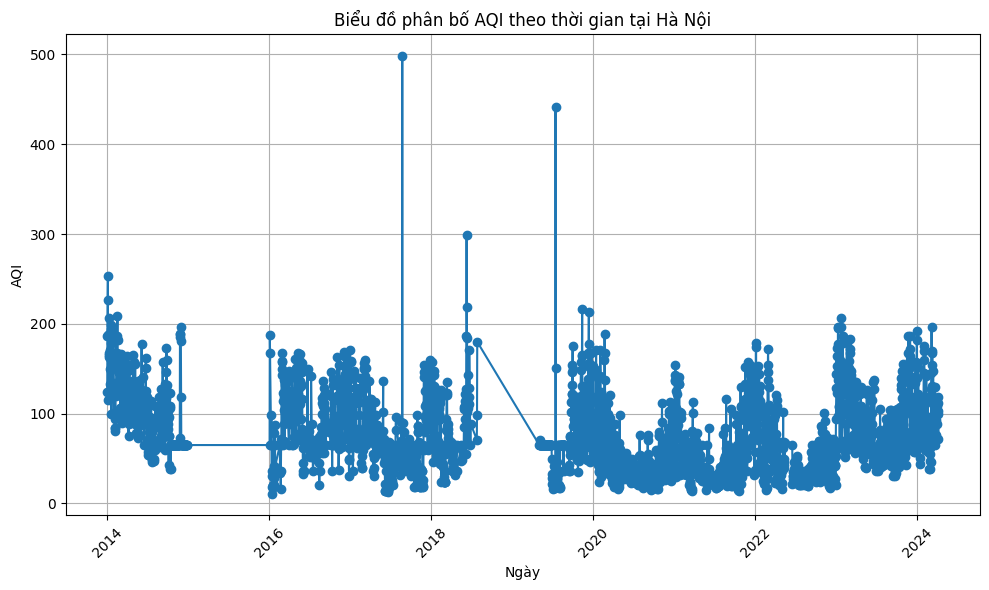

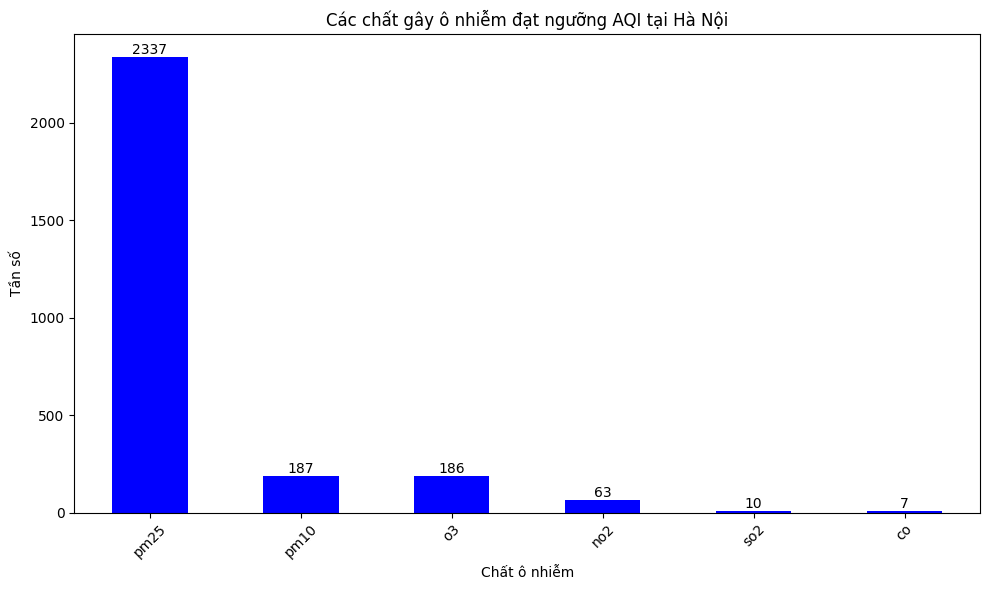

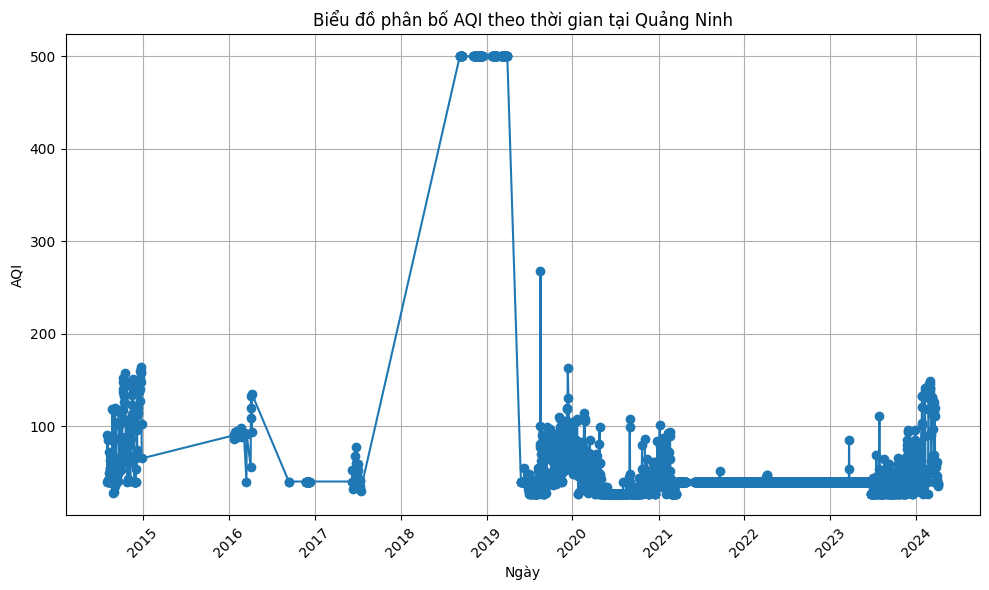

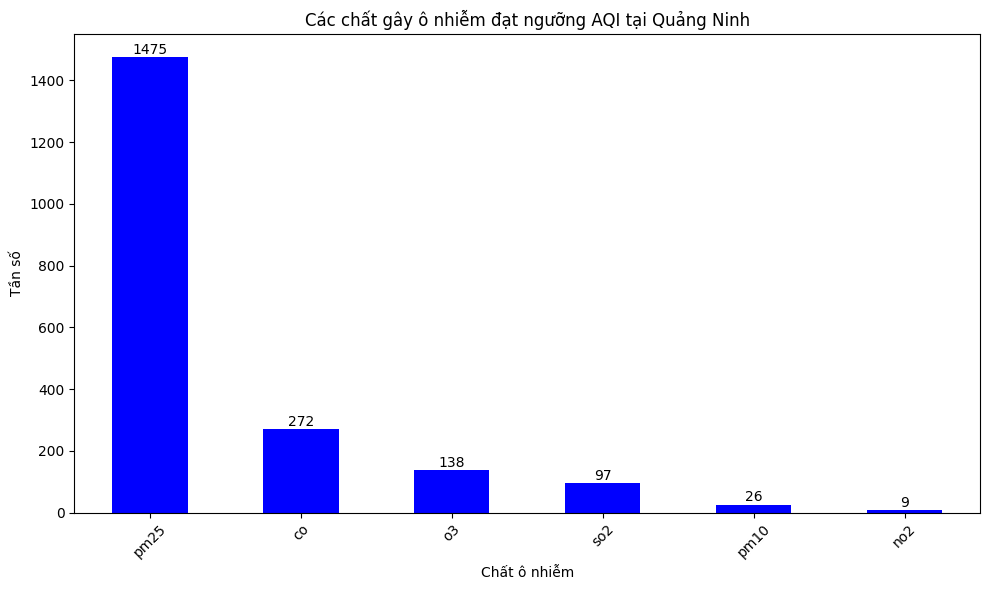

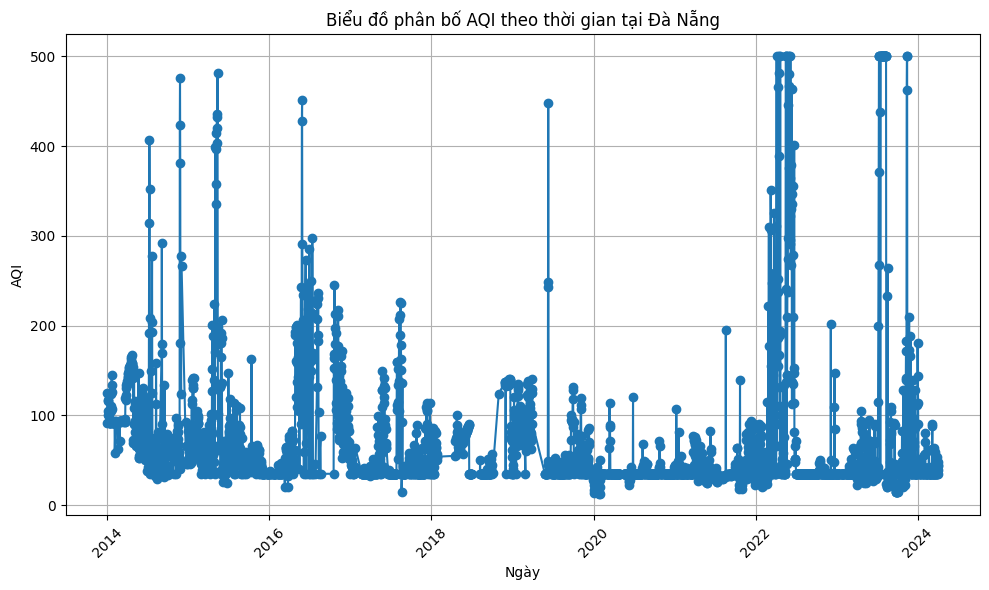

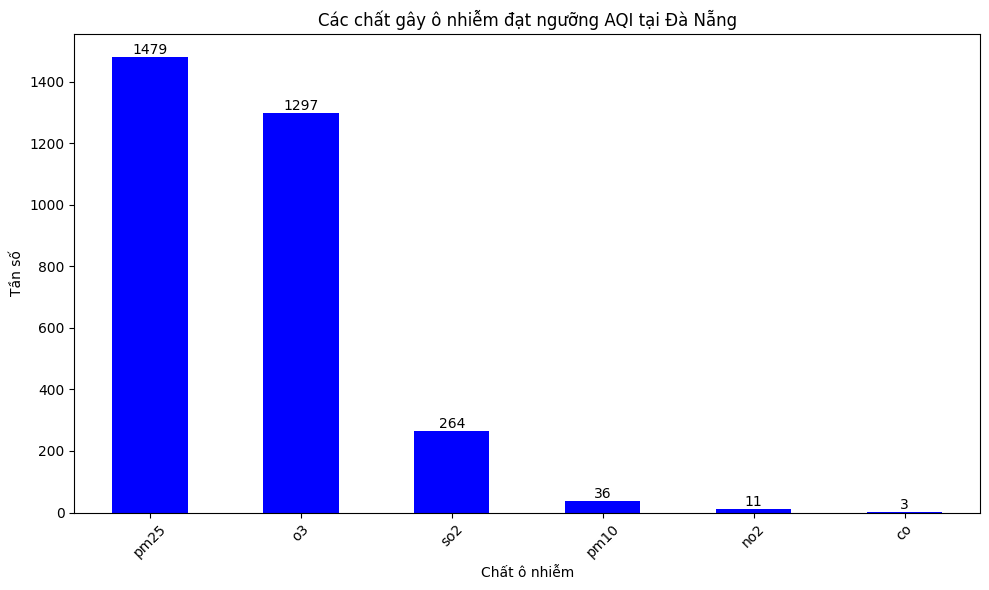

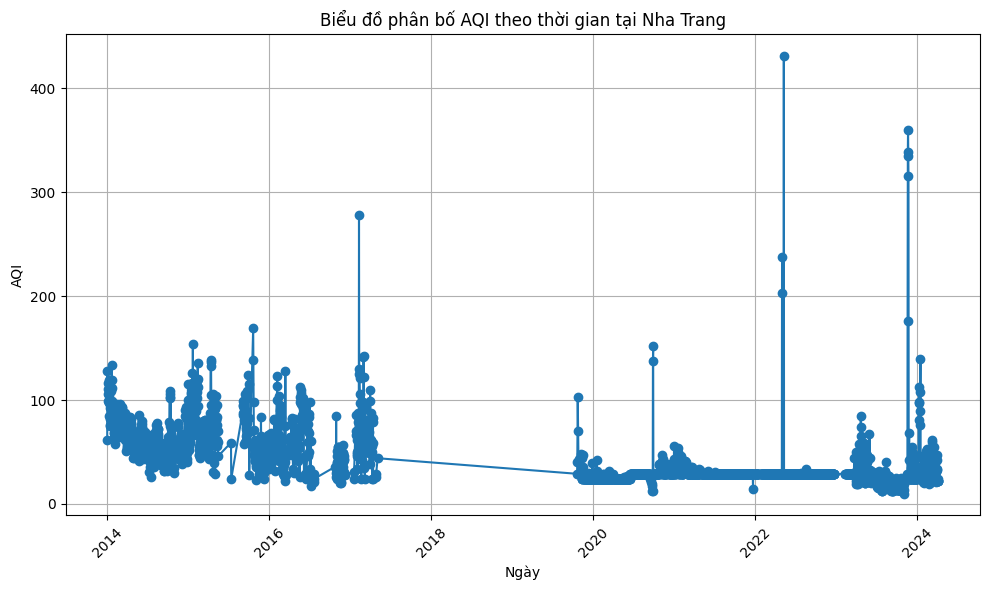

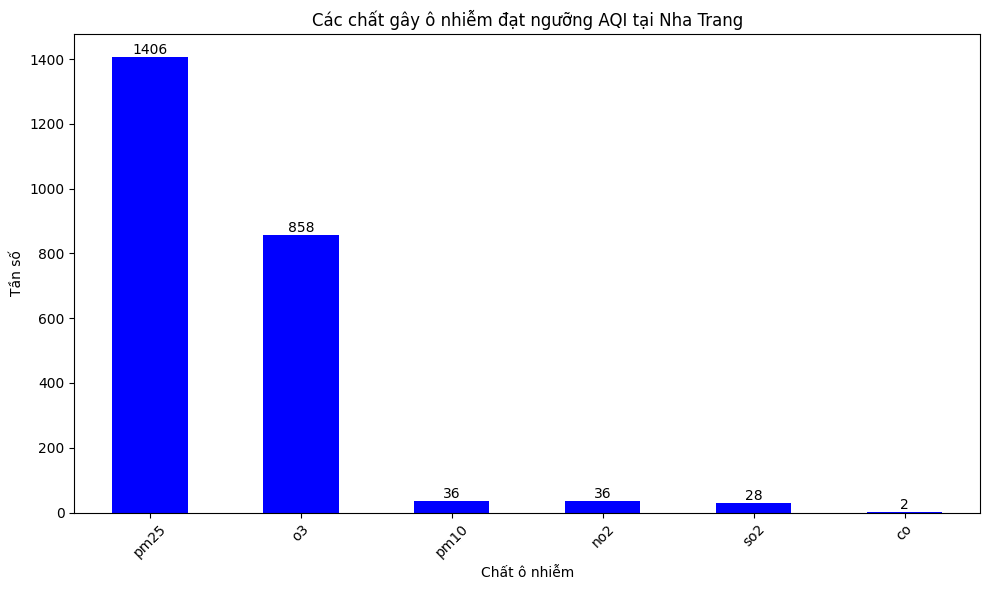

In [25]:
# Nhìn biểu đồ phân tích tần suất chỉ số AQI
# ....

aqi_graph_over_time(hanoi_df, 'Hà Nội')
frequency_of_pollutants(hanoi_df, 'Hà Nội')

aqi_graph_over_time(quang_ninh_df, 'Quảng Ninh')
frequency_of_pollutants(quang_ninh_df, 'Quảng Ninh')

aqi_graph_over_time(da_nang_df, 'Đà Nẵng')
frequency_of_pollutants(da_nang_df, 'Đà Nẵng')

aqi_graph_over_time(nha_trang_df, 'Nha Trang')
frequency_of_pollutants(nha_trang_df, 'Nha Trang')

# Từ các biểu đồ sau phân tích 

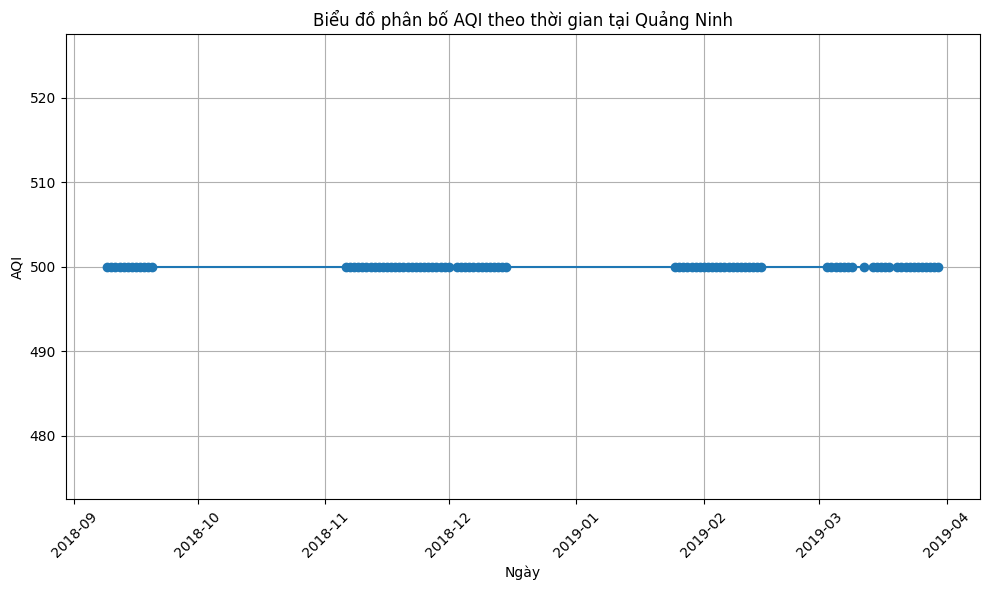

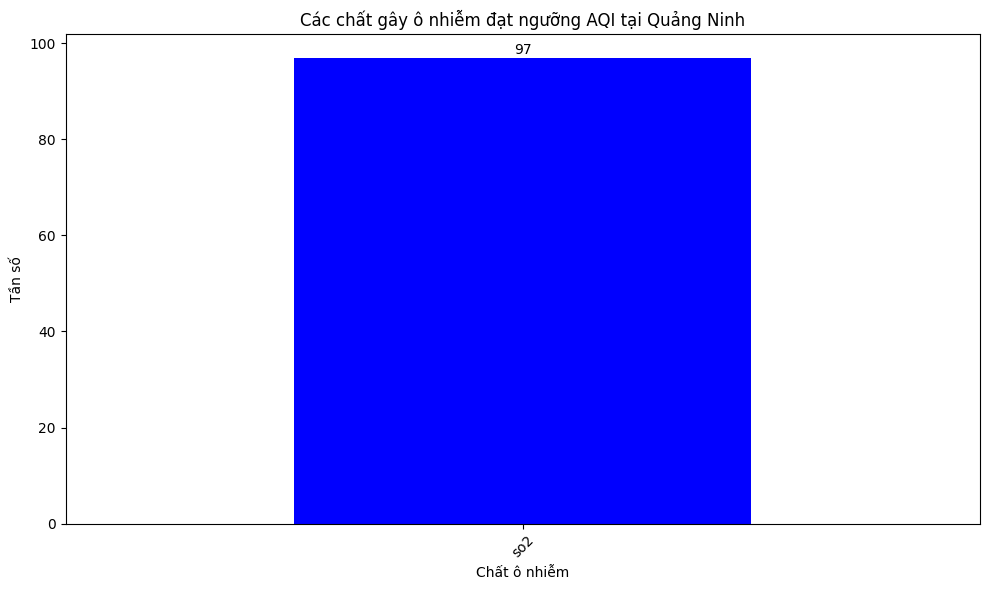

In [26]:
# Thấy khoảng giữa năm 2018 đến giữa 2019 mức AQI liên tục đạt ngưỡng 500 tại Quảng Ninh
aqi_graph_over_time(quang_ninh_df, 'Quảng Ninh', start_time="2018-01-01", end_time="2019-05-01") 
frequency_of_pollutants(quang_ninh_df, 'Quảng Ninh', start_time="2018-01-01", end_time="2019-05-01") 

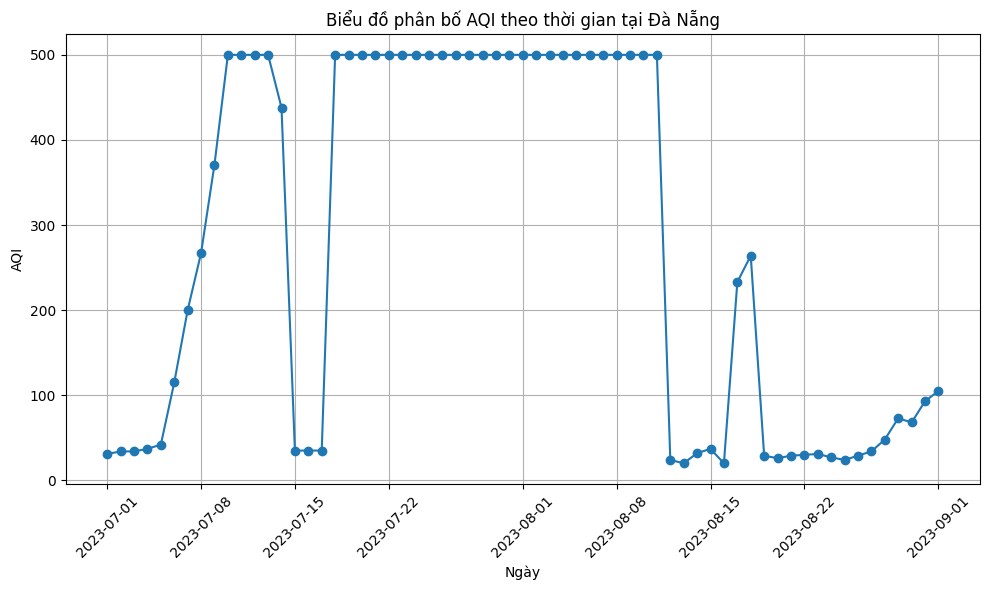

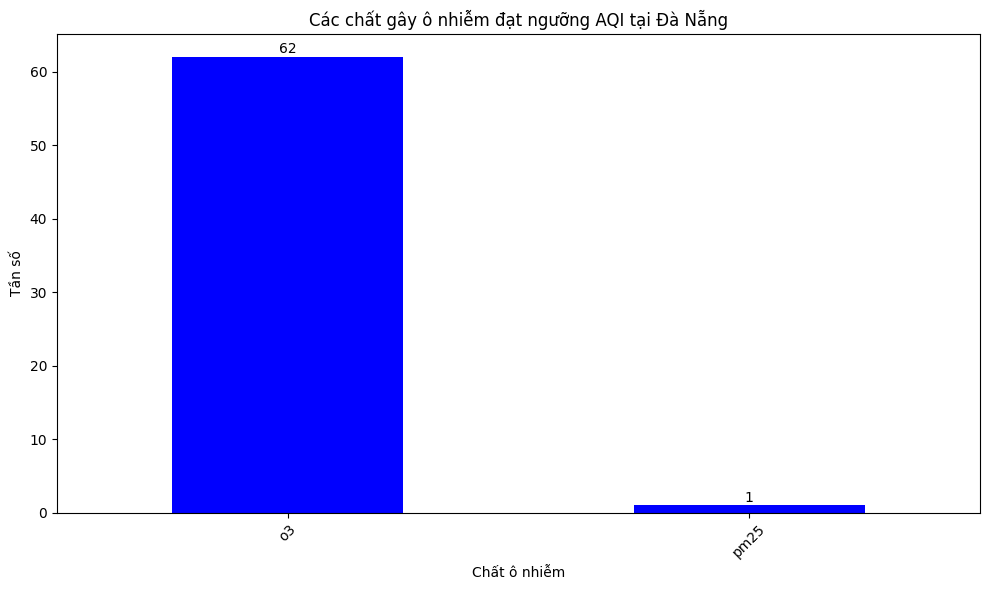

In [27]:
# Thấy khoảng giữa năm 2022 đến giữa 2024 mức AQI liên tục đạt ngưỡng cao tại Đà Nẵng
aqi_graph_over_time(da_nang_df, 'Đà Nẵng', start_time="2023-07-01", end_time="2023-09-01") 
frequency_of_pollutants(da_nang_df, 'Đà Nẵng', start_time="2023-07-01", end_time="2023-09-01") 

In [28]:
# Tạo một DataFrame mới chỉ chứa các chỉ số độc hại có giá trị lớn nhất
max_pollutants_df = hanoi_df.loc[:, ['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']].idxmax(axis=1)

# Đếm số lượng các chỉ số độc hại tạo ra AQI
max_pollutants_counts = max_pollutants_df.value_counts()
max_pollutants_counts

pm25    2337
pm10     187
o3       186
no2       63
so2       10
co         7
Name: count, dtype: int64

In [29]:
# Tạo hàm vẽ biểu đồ Pie để thể hiện sự phân bố của AQI Categories
def pie_chart_aqi_categories(df, name):
    aqi_categories_real = df['AQI Category'].unique()
    aqi_category_order = ['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy', 'Hazardous']
    aqi_category_order = [cat for cat in aqi_category_order if cat in aqi_categories_real]

    aqi_categories = df['AQI Category'].value_counts()
    sorted_aqi_categories = aqi_categories.reindex(aqi_category_order, fill_value=0)

    # Vẽ biểu đồ tròn
    plt.figure(figsize=(8, 8))
    plt.pie(sorted_aqi_categories, labels=[f"{cat} ({sorted_aqi_categories[cat] / sorted_aqi_categories.sum() * 100:.1f}%)"
                                                    for cat in sorted_aqi_categories.index], startangle=90)

    # Đặt tiêu đề cho biểu đồ
    plt.title(f'Phân bổ danh mục AQI tại {name}')

    # Thêm chú thích
    plt.legend(title="Danh mục AQI", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

    # Hiển thị biểu đồ
    plt.tight_layout()
    plt.show()

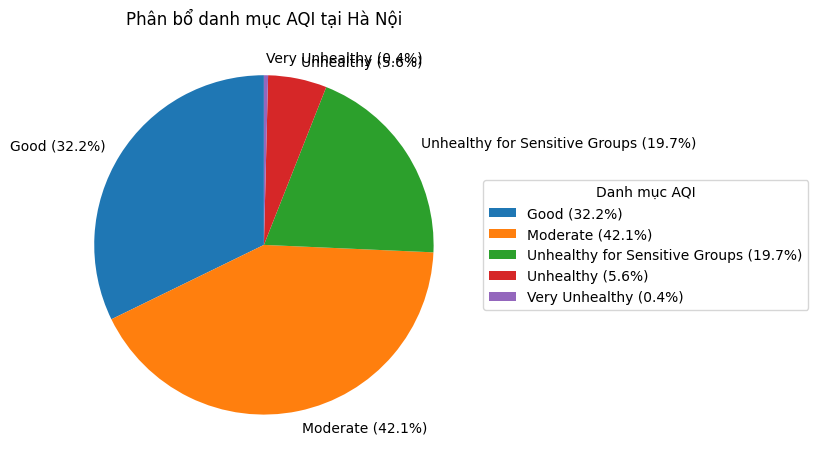

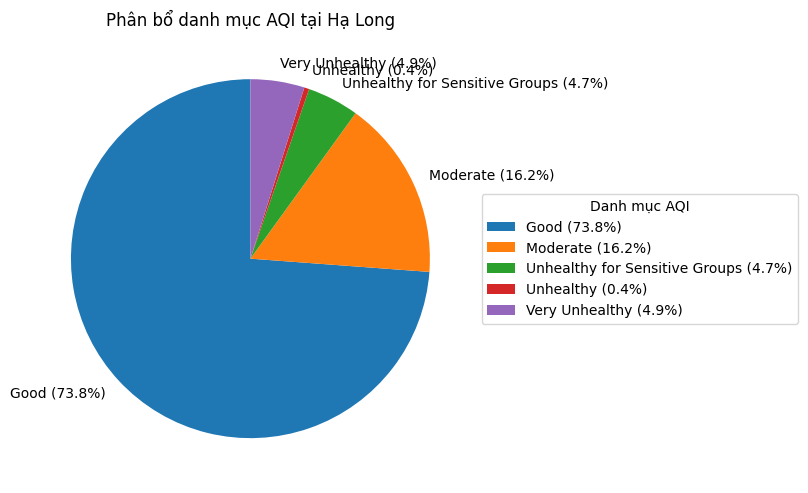

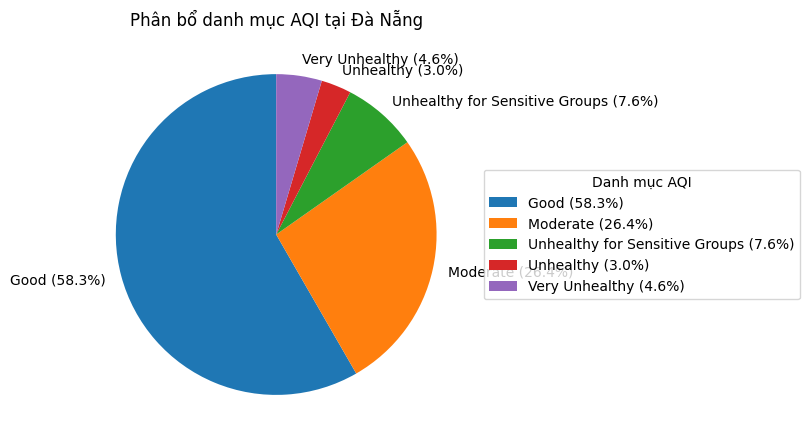

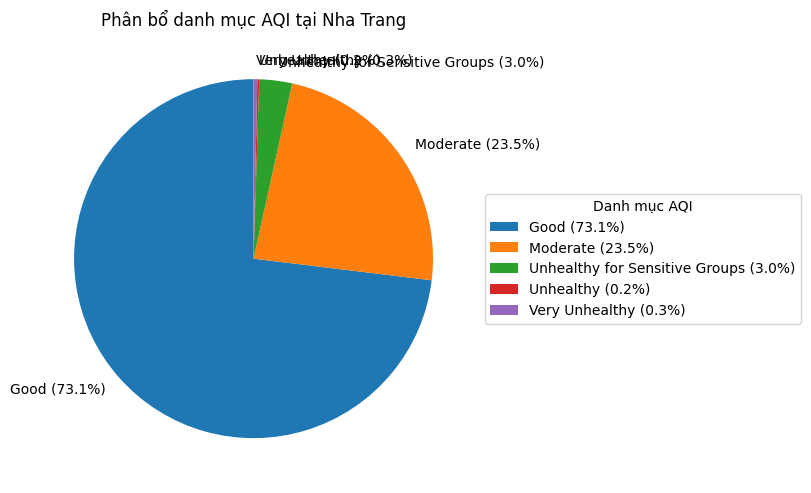

In [30]:
pie_chart_aqi_categories(hanoi_df, 'Hà Nội')
pie_chart_aqi_categories(quang_ninh_df, 'Hạ Long')
pie_chart_aqi_categories(da_nang_df, 'Đà Nẵng')
pie_chart_aqi_categories(nha_trang_df, 'Nha Trang')

## Đào tạo và kiểm thử các mô hình Machine Learning Classifier

In [31]:
# Tạo hàm chuyển đổi các AQI Categories sang dạng số để phục vụ train Model
def convert_categories_to_number(df):
    aqi_category_mapping = {
    'Good': 0,
    'Moderate': 1,
    'Unhealthy for Sensitive Groups': 2,
    'Unhealthy': 3,
    'Very Unhealthy': 4,
}

    # # Sử dụng fillna để thay thế các giá trị NaN trong cột 'AQI Category' bằng một giá trị mặc định
    # df['AQI Category'] = df['AQI Category'].map(aqi_category_mapping).fillna(-1).astype(int)

    # Chuyển đổi các giá trị của cột 'AQI Category' sang số
    df['AQI Category'] = df['AQI Category'].apply(lambda x: aqi_category_mapping.get(x, -1))

In [32]:
convert_categories_to_number(hanoi_df)
convert_categories_to_number(quang_ninh_df)
convert_categories_to_number(da_nang_df)
convert_categories_to_number(nha_trang_df)

In [33]:
hanoi_df['AQI Category'].value_counts()

AQI Category
1    1174
0     899
2     550
3     156
4      11
Name: count, dtype: int64

In [42]:
# Tạo hàm train và đánh giá Model
def train_model(df, model, nameModel):
    # Chia dữ liệu thành features (X) và target (y)
    X = df[['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']]
    y = df['AQI Category']

    # Chia dữ liệu thành tập huấn luyện và tập kiểm tra
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Huấn luyện mô hình
    model.fit(X_train, y_train)

    # Dự đoán trên tập kiểm tra
    y_pred = model.predict(X_test)

    # Đánh giá mô hình
    print(f"{nameModel} Accuracy Score:", accuracy_score(y_test, y_pred))
    print(f"\n{nameModel} Classification Report:")
    print(classification_report(y_test, y_pred))

    # In confusion matrix để đánh giá hiệu suất của mô hình
    print(f"\n{nameModel} Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    return accuracy_score(y_test, y_pred)

In [44]:
# Model : Random Forest Classifier
# Khởi tạo Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_accuracy_score = train_model(hanoi_df, rf_model, 'Random Forest')

Random Forest Accuracy Score: 0.9946236559139785

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       181
           1       1.00      1.00      1.00       228
           2       1.00      0.99      1.00       117
           3       0.97      1.00      0.98        31
           4       0.00      0.00      0.00         1

    accuracy                           0.99       558
   macro avg       0.79      0.80      0.79       558
weighted avg       0.99      0.99      0.99       558


Random Forest Confusion Matrix:
[[181   0   0   0   0]
 [  1 227   0   0   0]
 [  0   1 116   0   0]
 [  0   0   0  31   0]
 [  0   0   0   1   0]]


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

0.9946236559139785

In [36]:
train_model(quang_ninh_df, rf_model, 'Random Forest')

Random Forest Accuracy Score: 0.9900990099009901

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       302
           1       0.98      0.97      0.98        67
           2       0.95      0.95      0.95        21
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00        13

    accuracy                           0.99       404
   macro avg       0.79      0.78      0.79       404
weighted avg       0.99      0.99      0.99       404


Random Forest Confusion Matrix:
[[302   0   0   0   0]
 [  2  65   0   0   0]
 [  0   1  20   0   0]
 [  0   0   1   0   0]
 [  0   0   0   0  13]]


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [37]:
train_model(da_nang_df, rf_model, 'Random Forest')

Random Forest Accuracy Score: 0.9902912621359223

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       366
           1       0.99      1.00      0.99       176
           2       0.94      0.92      0.93        37
           3       0.88      0.88      0.88        16
           4       1.00      0.96      0.98        23

    accuracy                           0.99       618
   macro avg       0.96      0.95      0.96       618
weighted avg       0.99      0.99      0.99       618


Random Forest Confusion Matrix:
[[366   0   0   0   0]
 [  0 176   0   0   0]
 [  0   1  34   2   0]
 [  0   1   1  14   0]
 [  0   0   1   0  22]]


In [38]:
train_model(nha_trang_df, rf_model, 'Random Forest')

Random Forest Accuracy Score: 0.9936708860759493

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       354
           1       0.99      1.00      1.00       104
           2       0.87      0.93      0.90        14
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1

    accuracy                           0.99       474
   macro avg       0.57      0.59      0.58       474
weighted avg       0.99      0.99      0.99       474


Random Forest Confusion Matrix:
[[354   0   0   0   0]
 [  0 104   0   0   0]
 [  0   1  13   0   0]
 [  0   0   1   0   0]
 [  0   0   1   0   0]]


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [45]:
# Model : KNeighbors Classifier
# Khởi tạo Model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_accuracy_score = train_model(hanoi_df, knn_model, 'KNeighbors')
# train_model(quang_ninh_df, knn_model, 'KNeighbors')
# train_model(da_nang_df, knn_model, 'KNeighbors')
# train_model(nha_trang_df, knn_model, 'KNeighbors')

KNeighbors Accuracy Score: 0.9390681003584229

KNeighbors Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       181
           1       0.95      0.96      0.96       228
           2       0.91      0.88      0.90       117
           3       0.76      0.81      0.78        31
           4       0.00      0.00      0.00         1

    accuracy                           0.94       558
   macro avg       0.72      0.72      0.72       558
weighted avg       0.94      0.94      0.94       558


KNeighbors Confusion Matrix:
[[176   5   0   0   0]
 [  4 220   4   0   0]
 [  0   7 103   7   0]
 [  0   0   6  25   0]
 [  0   0   0   1   0]]


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [46]:
# Model : XGBoost Classifier
# Khởi tạo Model
xgb_model = XGBClassifier(random_state=42)
xgb_accuracy_score = train_model(hanoi_df, xgb_model, 'XGBoost')
# train_model(quang_ninh_df, xgb_model, 'XGBoost')
# train_model(da_nang_df, xgb_model, 'XGBoost')
# train_model(nha_trang_df, xgb_model, 'XGBoost')

XGBoost Accuracy Score: 0.992831541218638

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       181
           1       1.00      0.99      1.00       228
           2       0.99      0.99      0.99       117
           3       0.94      1.00      0.97        31
           4       0.00      0.00      0.00         1

    accuracy                           0.99       558
   macro avg       0.79      0.80      0.79       558
weighted avg       0.99      0.99      0.99       558


XGBoost Confusion Matrix:
[[181   0   0   0   0]
 [  1 226   1   0   0]
 [  0   0 116   1   0]
 [  0   0   0  31   0]
 [  0   0   0   1   0]]


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

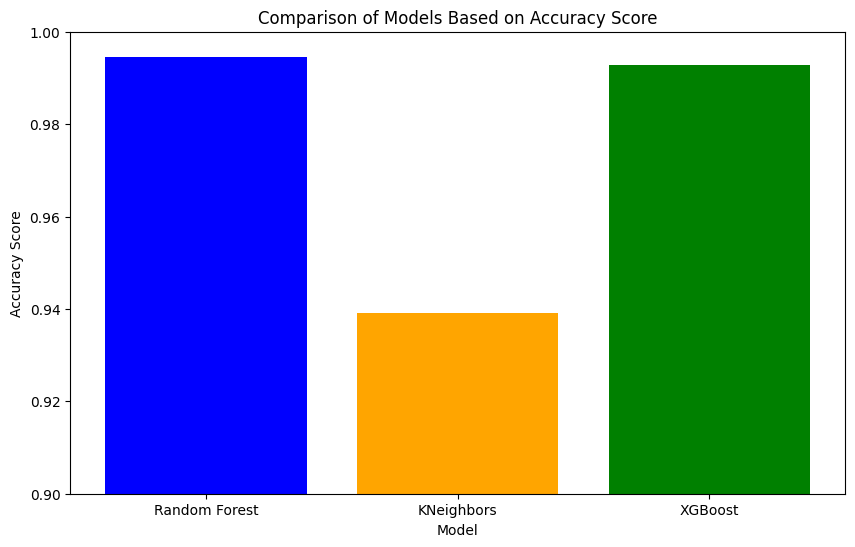

In [47]:
import matplotlib.pyplot as plt

# Các tên của các mô hình
models = ['Random Forest', 'KNeighbors', 'XGBoost']

# Accuracy Score tương ứng của các mô hình khi train DataFrame hanoi_df
accuracy_scores = [rf_accuracy_score, knn_accuracy_score, xgb_accuracy_score]  # Thay thế các giá trị này bằng kết quả accuracy score của mô hình của bạn

# Vẽ biểu đồ so sánh
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_scores, color=['blue', 'orange', 'green'])
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Models Based on Accuracy Score')
plt.ylim(0.9, 1)  # Đặt giới hạn trục y từ 0.9 đến 1 để dễ nhìn
plt.show()
